In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Countries Dataset exploration
3 datasets are going to be used: **exposure.csv** , **Countries.csv** and **Countries-Continents.csv**

## Loading the libraries

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import re

## Loading and inspecting the main dataset

In [4]:
exposure_df = pd.read_csv('exposure.csv',sep=';',decimal=",",engine='python')

In [5]:
exposure_df.head()
#Possible to see that there are values with no data,{No data and x}. 

,country,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,...,tourism dependence,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import
0,Liechtenstein,No,HIC,No data,x,No data,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
1,Eritrea,No,LIC,No data,x,No data,x,x,x,x,...,x,165.1,10.0,x,x,x,x,10.0,10.0,10.0
2,Bahrain,No,HIC,No data,x,No data,x,9.4,3.7,76.2,...,3.9,101.7,10.0,0.88,10.0,0.29,0.1,6.3,7.5,8.5
3,South Sudan,Yes,LIC,No data,x,35.27,10.0,x,x,98.8,...,x,34.4,1.8,0.20,10.0,x,x,8.0,8.0,8.0
4,Bahamas,No,HIC,No data,x,No data,x,19.3,7.7,x,...,10.0,61.5,5.2,x,x,3.96,1.6,6.1,7.6,7.6


In [6]:
#To deal with this, first the dataset is going to standarized to NaN when there is no data to show:
exposure_df = pd.read_csv('exposure.csv',sep=';',decimal=",",engine='python',  na_values={'x', 'No data'})
exposure_df.head()

,country,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,...,tourism dependence,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import
0,Liechtenstein,No,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eritrea,No,LIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,165.1,10.0,NaN,NaN,NaN,NaN,10.0,10.0,10.0
2,Bahrain,No,HIC,NaN,NaN,NaN,NaN,9.4,3.7,76.2,...,3.9,101.7,10.0,0.88,10.0,0.29,0.1,6.3,7.5,8.5
3,South Sudan,Yes,LIC,NaN,NaN,35.27,10.0,NaN,NaN,98.8,...,NaN,34.4,1.8,0.20,10.0,NaN,NaN,8.0,8.0,8.0
4,Bahamas,No,HIC,NaN,NaN,NaN,NaN,19.3,7.7,NaN,...,10.0,61.5,5.2,NaN,NaN,3.96,1.6,6.1,7.6,7.6


In [7]:
#Now I want to check the info of the dataframe to explore it more. Possible to see that many rows of the dataframe have NaN
#values, so we need to clean the dataframe.
exposure_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   country                                                                    191 non-null    object 
 1   GHRP                                                                       191 non-null    object 
 2   Income classification according to WB                                      191 non-null    object 
 3   Net_ODA_received_perc_of_GNI                                               134 non-null    float64
 4   Aid dependence                                                             132 non-null    float64
 5   Volume of remittances in USD as a proportion of total GDP percent 2014-18  178 non-null    float64
 6   Remittances                                       

In [8]:
#First I'm going to check the countries that have Nan values in order to remove these rows from the dataframe.
exposure_df.loc[exposure_df['country'].isnull()]

,country,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,...,tourism dependence,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import
191,NaN,NaN,NaN,5.0,NaN,5.0,NaN,0.0,NaN,0.0,...,NaN,20.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,25.0,NaN,25.0,NaN,25.0,NaN,75.0,...,NaN,100.0,NaN,6.0,NaN,25.0,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#There is many countries with NaN values, hence, they are going to be removed from the dataframe
exposure_df.dropna(subset=['country'], inplace=True)
#After removing the NaN countries, the dataframe now contains only 191.
exposure_df.sort_values(by='country', inplace=True)
exposure_df


,country,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,...,tourism dependence,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import
188,Afghanistan,Yes,LIC,19.37,7.2,1.99,0.0,32.3,10.0,11.6,...,0.4,7.5,0.0,12.19,0.0,0.62,0.2,2.4,2.0,0.4
82,Albania,No,MIC,1.20,0.0,9.68,2.3,13.5,5.4,3.7,...,10.0,66.7,5.8,6.37,0.0,7.97,3.2,3.4,4.0,3.7
66,Algeria,No,MIC,0.11,0.0,1.07,0.0,20.2,8.1,94.7,...,2.7,46.1,3.3,NaN,NaN,0.87,0.3,3.5,4.8,4.0
48,Angola,Yes,MIC,0.19,0.0,0.00,0.0,19.8,7.9,98.6,...,1.5,95.0,9.4,5.41,1.2,-5.42,0.0,3.8,5.0,4.4
30,Antigua and Barbuda,No,HIC,0.69,0.0,2.16,0.0,27.8,10.0,0.3,...,10.0,90.0,8.8,3.21,5.6,8.39,3.4,4.7,5.7,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,Venezuela,Yes,MIC,NaN,NaN,0.03,0.0,NaN,NaN,88.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.3,4.3,4.3
108,Viet Nam,No,MIC,1.12,0.0,6.51,0.8,8.0,3.2,3.1,...,3.7,54.3,4.3,2.53,6.9,6.32,2.5,2.7,3.2,3.2
143,Yemen,Yes,LIC,10.37,2.7,12.45,3.7,46.9,10.0,0.5,...,2.1,56.3,4.5,NaN,NaN,-1.05,0.0,3.3,4.1,2.6
11,Zambia,Yes,MIC,4.09,0.0,0.40,0.0,5.3,2.1,78.5,...,2.9,91.6,9.0,1.77,8.5,1.53,0.6,4.1,5.4,6.1


## Dataset join with info from the countries
The dataset **countries.csv** that cointain information of the countries cities is going to be add to the **exposure_df** dataset.

In [10]:
#The dataset contains a column called Cities that has a string containg the information of the cities of the country
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,Country,Cities
0,Afghanistan,"{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos..."
1,Albania,"{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""..."
2,Algeria,"{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat..."
3,Andorra,"{""Country"":""Andorra"",""City"":""Aix\u00e0s"",""Lati..."
4,Angola,"{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati..."


In [11]:
#for joining both datasets, the name of the country is going to be used. Because there are some countries with different
#names in the datasets (e.g. 'Russian Federation' and 'Russia') it is necessary to first normalize the contries that have
#different name.
#After inspecting the datasets, the following dictionary is needed for the normalization:
dict_countries = {'Brunei Darussalam': 'Brunei', 'Cabo Verde': 'Cape Verde', 'Congo': 'Republic of the Congo', 'Congo DR': 'Democratic Republic of the Congo', \
                 "Côte d'Ivoire": 'Ivory Coast', 'Eswatini': 'Swaziland', 'Korea DPR': 'North Korea', 'Korea Republic of': 'South Korea', \
                 'Lao PDR': 'Laos', 'Moldova Republic of': 'Moldova', 'North Macedonia': 'Macedonia', 'Palestine': 'Palestinian Territory', \
                 'Russian Federation': 'Russia', 'United States of America': 'United States', 'Viet Nam': 'Vietnam'}

exposure_df.rename(columns={'country': 'Country'}, inplace=True)
exposure_df.replace({'Country': dict_countries}, inplace=True)

#joining the datasets
df = exposure_df.join(countries_df.set_index('Country'), on='Country')
df = df[pd.notnull(df['Cities'])] #removing countries without match
df.set_index('Country', inplace=True)

df.head()

,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,primary commodity export dependence,...,General government gross debt Percent of GDP 2019,Government indeptedness,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,Cities
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Yes,LIC,19.37,7.2,1.99,0.0,32.3,10.0,11.6,1.5,...,7.5,0.0,12.19,0.0,0.62,0.2,2.4,2.0,0.4,"{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos..."
Albania,No,MIC,1.20,0.0,9.68,2.3,13.5,5.4,3.7,0.5,...,66.7,5.8,6.37,0.0,7.97,3.2,3.4,4.0,3.7,"{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""..."
Algeria,No,MIC,0.11,0.0,1.07,0.0,20.2,8.1,94.7,10.0,...,46.1,3.3,NaN,NaN,0.87,0.3,3.5,4.8,4.0,"{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat..."
Angola,Yes,MIC,0.19,0.0,0.00,0.0,19.8,7.9,98.6,10.0,...,95.0,9.4,5.41,1.2,-5.42,0.0,3.8,5.0,4.4,"{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati..."
Antigua and Barbuda,No,HIC,0.69,0.0,2.16,0.0,27.8,10.0,0.3,0.0,...,90.0,8.8,3.21,5.6,8.39,3.4,4.7,5.7,4.9,"{""Country"":""Antigua and Barbuda"",""City"":""Aberd..."


## Adding the latitude and longitude of the countries
2 functions are going to be developed: **avg_latitude** and **avg_longitude**. This functions are going to operate on the
cities of each country and calculate an average latitude and longitude of the contry in order to know the position 
in the world of each country.

In [12]:
def avg_latitude(string):
    '''param: string containing info of Country. Returns avg latitude''' 
    #modifying to json format
    if type(string) == float:
        return np.nan
    
    format_string = string.replace('|||', ',')
    format_string = '[{}]'.format(format_string)
    country_dict = json.loads(format_string)
    
    total_latitudes = np.array([city['Latitude'] for city in country_dict])
    latitude_mean = round(np.mean(np.unique(total_latitudes)),3) #mean of the unique values
    return latitude_mean

def avg_longitude(string):
    '''param: string containing info of Country. Returns avg longitude'''
    #modifying to json format
    if type(string) == float:
        return np.nan
    
    format_string = string.replace('|||', ',')
    format_string = '[{}]'.format(format_string)
    country_dict = json.loads(format_string)
    
    total_longitudes = np.array([city['Longitude'] for city in country_dict])
    longitude_mean = round(np.mean(np.unique(total_longitudes)),3) #mean of the unique values
    return longitude_mean

In [13]:
### applying the functions to the dataset:
df['avg_latitude']  = df.apply(lambda country: avg_latitude(country['Cities']), axis=1)
df['avg_longitude']  = df.apply(lambda country: avg_longitude(country['Cities']), axis=1)

In [14]:
df.head()

,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,primary commodity export dependence,...,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,Cities,avg_latitude,avg_longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Yes,LIC,19.37,7.2,1.99,0.0,32.3,10.0,11.6,1.5,...,12.19,0.0,0.62,0.2,2.4,2.0,0.4,"{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos...",34.139,67.237
Albania,No,MIC,1.20,0.0,9.68,2.3,13.5,5.4,3.7,0.5,...,6.37,0.0,7.97,3.2,3.4,4.0,3.7,"{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""...",41.134,20.041
Algeria,No,MIC,0.11,0.0,1.07,0.0,20.2,8.1,94.7,10.0,...,NaN,NaN,0.87,0.3,3.5,4.8,4.0,"{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat...",35.346,2.977
Angola,Yes,MIC,0.19,0.0,0.00,0.0,19.8,7.9,98.6,10.0,...,5.41,1.2,-5.42,0.0,3.8,5.0,4.4,"{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati...",-9.930,16.365
Antigua and Barbuda,No,HIC,0.69,0.0,2.16,0.0,27.8,10.0,0.3,0.0,...,3.21,5.6,8.39,3.4,4.7,5.7,4.9,"{""Country"":""Antigua and Barbuda"",""City"":""Aberd...",17.201,-61.783


## Adding the population to each country

In [15]:
def get_population(string):
    '''param: string containing info of Country. Returns the total population of the country'''
    #modifying to json format
    if type(string) == float:
        return np.nan
    
    format_string = string.replace('|||', ',')
    format_string = '[{}]'.format(format_string)
    country_dict = json.loads(format_string)
    
    population = np.array([city['Population'] for city in country_dict if city['Population'] ])
    population = np.sum(population) #suming up the population of all the cities of each country
    return population

In [16]:
df['Population'] = df.apply(lambda country: get_population(country['Cities']), axis=1)

## Adding the continent
With the help of the dataset **Countries-Continents.csv**  that contains the info to which continent each country belongs.

In [20]:
continents_df = pd.read_csv('Countries-Continents.csv')

#After inspecting the datasets, the following dictionary is needed for the normalization of the countries names:
dict_countries = {'Burkina': 'Burkina Faso', 'Congo': 'Republic of the Congo', 'Congo, Democratic Republic of': \
                      'Democratic Republic of the Congo', 'CZ':'Czech Republic', 'Korea, North':'North Korea', 'Korea, South':\
                      'South Korea', 'Burma (Myanmar)': 'Myanmar','Russian Federation': 'Russia', 'US': 'United States'}
continents_df.replace({'Country': dict_countries}, inplace=True)

In [21]:
df = df.join(continents_df.set_index('Country'), on='Country')

## Checking the distance of the countries to Wuhan, China
Since the pandemic started in Wuhan (coordinates: 30.5928, 114.3055), the distance from each contry to Wuhan is going to be calculated using the **Harvesine formula** ([More info](https://en.wikipedia.org/wiki/Haversine_formula)).

In [23]:
def harvesine_formula(lat1, long1, lat2, long2):
    '''calculates the distance in km of 2 coordinates points using the harvesine formula '''
    lat1,long1 = math.radians(lat1), math.radians(long1)
    lat2,long2 = math.radians(lat2), math.radians(long2)
    distance_long = long2 - long1
    distance_lat = lat2 - lat1
    #harvesinge formula
    R = 6373 #Earth Radio in km
    a = math.sin(distance_lat / 2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(distance_long / 2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = round(R * c,3)
    return d

In [27]:
## Adding the distance to Wuhan for each country in the dataframe, and ordering the countries from the closest to Wuhan
df['distance_to_Wuhan']  = df.apply(lambda country: harvesine_formula(country['avg_latitude'], country['avg_longitude'], lat2=30.5928, long2=114.3055), axis=1)
df.sort_values(by='distance_to_Wuhan', inplace=True)

##showing the 10 closest countries to Wuhan
df.head(10)

,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,primary commodity export dependence,...,Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,Cities,avg_latitude,avg_longitude,Population,Continent,distance_to_Wuhan
Country,,,,,,,,,,,,,,,,,,,,,
China,No,MIC,-0.01,0.0,0.18,0.0,6.3,2.5,3.1,0.4,...,0.6,1.6,2.0,1.9,"{""Country"":""China"",""City"":""103 Chang Qingniand...",31.033,113.761,218884084.0,Asia,71.435
South Korea,No,HIC,NaN,NaN,0.42,0.0,5.8,2.3,9.9,1.3,...,0.4,1.2,1.3,1.1,"{""Country"":""South Korea"",""City"":""\u00c2\u00bf\...",36.398,127.742,10323448.0,Asia,1401.805
North Korea,Yes,LIC,NaN,NaN,NaN,NaN,NaN,NaN,32.0,4.3,...,NaN,4.3,4.3,4.3,"{""Country"":""North Korea"",""City"":""Aanshu"",""Lati...",39.685,126.953,0.0,Asia,1528.891
Laos,No,MIC,2.98,0.0,1.50,0.0,13.5,5.4,0.3,0.0,...,2.9,3.5,4.1,3.9,"{""Country"":""Laos"",""City"":""A Alao"",""Latitude"":1...",19.663,102.813,495430.0,Asia,1676.252
Vietnam,No,MIC,1.12,0.0,6.51,0.8,8.0,3.2,3.1,0.4,...,2.5,2.7,3.2,3.2,"{""Country"":""Vietnam"",""City"":""A\u00e0m T\u00e2m...",17.571,105.562,13256370.0,Asia,1697.219
Mongolia,No,MIC,7.78,1.4,4.39,0.0,11.4,4.6,89.6,10.0,...,6.0,4.4,4.8,4.8,"{""Country"":""Mongolia"",""City"":""Abaragin Khid"",""...",47.103,103.849,1168089.0,Asia,2043.345
Japan,No,HIC,NaN,NaN,0.09,0.0,9.4,3.8,4.1,0.6,...,0.2,2.5,2.9,2.7,"{""Country"":""Japan"",""City"":""A"",""Latitude"":26.60...",36.051,136.728,101577008.0,Asia,2165.016
Myanmar,Yes,MIC,2.36,0.0,3.87,0.0,13.1,5.2,27.1,3.6,...,0.7,2.5,3.2,2.8,"{""Country"":""Myanmar"",""City"":""Aba-wa"",""Latitude...",18.538,97.383,11283081.0,Asia,2169.605
Philippines,No,MIC,0.04,0.0,10.22,2.6,11.2,4.5,6.6,0.9,...,1.2,2.5,3.2,2.9,"{""Country"":""Philippines"",""City"":""Aabayat"",""Lat...",12.478,122.494,48127027.0,Asia,2183.726


## Calculating the average Economic Exposure index for each continent


In [28]:
#grouping by continent and calculating the mean
df_continents = df[['Continent','Covid_19_Economic_exposure_index']].groupby('Continent').mean().round(2)
df_continents.rename(columns={'Covid_19_Economic_exposure_index': 'Avg_covid_19_Economic_exposure_index'}, inplace=True)
df_continents.sort_values(by='Avg_covid_19_Economic_exposure_index',ascending=False,inplace=True)
df_continents

,Avg_covid_19_Economic_exposure_index
Continent,
North America,3.79
Oceania,3.50
Africa,3.41
Europe,3.31
Asia,2.94
South America,2.76


## Percentages of the world population of each country in a continent

In [60]:
def perc_pop_continent(df, continent):
    '''returns a plot of the percentage of the world population in a Continent'''
    assert continent in ['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America'], 'Please check the continents supported on the list'
    world_population = df['Population'].sum(skipna = True)
    
    df_continent = df.loc[(df['Continent'] == continent)]
    df_continent = df_continent.sort_values(by='Population',ascending=False)
    df_continent['World Population Percentage'] = df_continent.apply(lambda country: (country['Population']/world_population*100), axis=1)
    total_continent = df_continent['World Population Percentage'].sum(skipna = True)
    plt.tight_layout()
    ax = df_continent['World Population Percentage'].plot(kind='barh', title= f'Percentage of the world population living in the countries of {continent}', figsize=(8,8), legend=True)
    ax.set_xlabel("% of World Population")

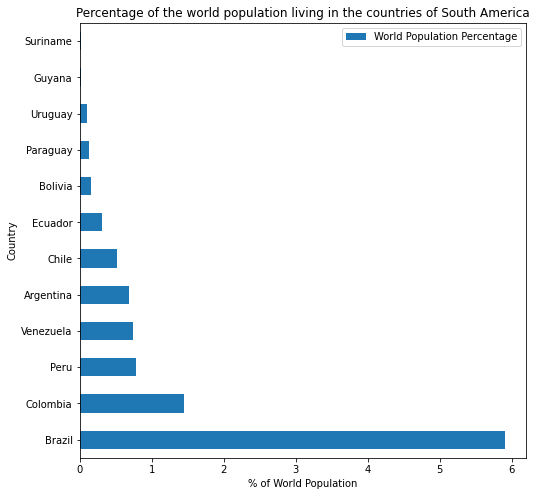

In [65]:
perc_pop_continent(df, 'South America')

## Plotting the countries
Each country is represented by a circle that represents the size of the population

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Continents based on countries population')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

<Figure size 432x288 with 0 Axes>

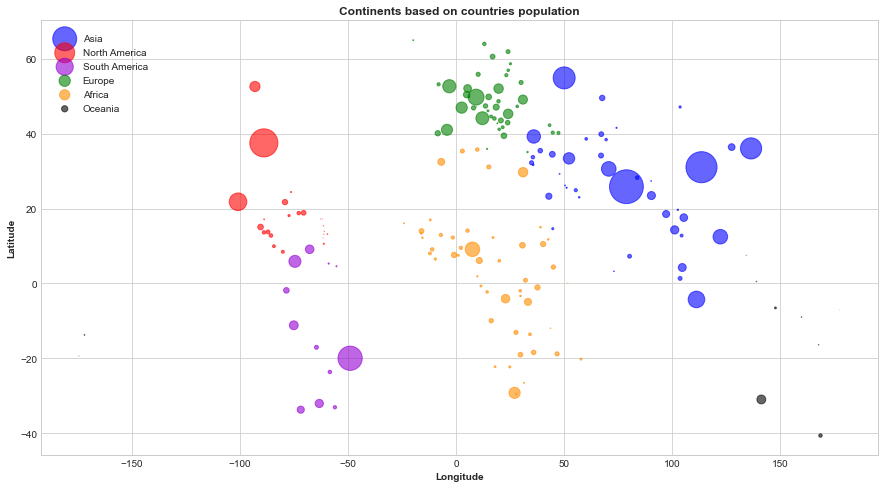

In [90]:
df['Population Percentage'] = df.apply(lambda country: ((country['Population']/world_population)*10000), axis=1)
##*10000 to scale the scatter plot
#splitting into continents
df_SA = df[(df['Continent'] == 'South America')]
df_NA = df[(df['Continent'] == 'North America')]
df_Europe = df[(df['Continent'] == 'Europe')]
df_Africa = df[(df['Continent'] == 'Africa')]
df_Asia = df[(df['Continent'] == 'Asia')]
df_Oceania = df[(df['Continent'] == 'Oceania')]

#scatter plot for each continent
continents_dflist =[df_Asia,df_NA,df_SA,df_Europe, df_Africa,df_Oceania]
colors = {'South America':'darkviolet','North America':'red','Africa':'darkorange', 'Europe':'green', 'Asia':'blue', 'Oceania':'black'}
plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))
for continent in continents_dflist:
    plt.scatter(continent['avg_longitude'], continent['avg_latitude'], c=continent['Continent'].map(colors),label=(continent['Continent']),s=continent['Population Percentage'],alpha=0.6)

plt.title('Continents based on countries population', fontweight ="bold")
plt.xlabel('Longitude',fontweight ="bold")
plt.ylabel('Latitude',fontweight ="bold")
plt.legend(('Asia', 'North America', 'South America', 'Europe','Africa', 'Oceania',),\
          bbox_to_anchor=(0,0.8,1,0.2), loc="upper right",mode="expand", borderaxespad=1, ncol=1)


## Calculating the average Foreign direct investment and Net ODA received perc of GNI
for each income class (Income classification according to WB) (HIC = high-income country, LIC = low-income country, MIC = middle-income country)

In [66]:
df_income_class =df[['Income classification according to WB','Foreign direct investment','Net_ODA_received_perc_of_GNI']].groupby('Income classification according to WB', dropna=True).mean().round(2)
df_income_class.rename(columns={'Foreign direct investment':'Avg Foreign direct investment','Net_ODA_received_perc_of_GNI':'Avg Net ODA received perc of GNI'}, inplace=True)
df_income_class

,Avg Foreign direct investment,Avg Net ODA received perc of GNI
Income classification according to WB,,
HIC,1.51,1.68
LIC,1.94,11.77
MIC,1.42,3.95


## Comparing metrics between the income classes
The following metricas are going to be compared:\
- Covid 19 Economic exposure index Ex aid and FDI
- Covid 19 Economic exposure index Ex aid and FDI and food import

Text(0.5, 0.98, 'Average Index for Income Classification')

<AxesSubplot:xlabel='Income classification according to WB'>

Text(0.5, 1.0, 'Covid 19 Economic Exposure')

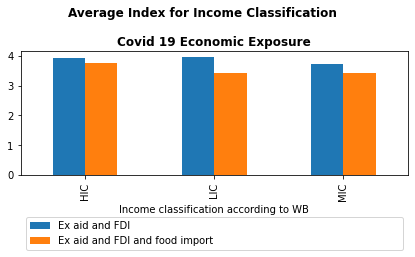

In [83]:
df_economic_exp =df[['Income classification according to WB','Covid_19_Economic_exposure_index_Ex_aid_and_FDI','Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import']].groupby('Income classification according to WB', dropna=True).mean().round(2)
df_economic_exp = df_economic_exp.rename(columns={'Income classification according to WB': 'Income classification', 'Covid_19_Economic_exposure_index_Ex_aid_and_FDI': 'Ex aid and FDI','Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import': 'Ex aid and FDI and food import'})

#plot
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.suptitle('Average Index for Income Classification',fontweight ="bold")
df_economic_exp.plot.bar(y=['Ex aid and FDI','Ex aid and FDI and food import'], ax=ax)
ax.set_title('Covid 19 Economic Exposure', fontweight ="bold")
ax.legend(bbox_to_anchor=(-0.,-0.50,1,0.2), loc="upper right",mode="expand")
fig.tight_layout()